## three hidden layers, ReLU, XE


In [1]:
import numpy as np

'''read the data'''

# Specify the path to the CSV file
path_train = 'data/MNIST_train_1000.csv'
path_test = 'data/MNIST_test_100.csv'


data_train = np.genfromtxt(path_train, delimiter=',', skip_header=0, dtype=int)
data_test = np.genfromtxt(path_test, delimiter=',', skip_header=0, dtype=int)

In [2]:
m,m1 = data_train.shape[0], data_test.shape[0]
ny = 10

In [3]:
'''
get the training and test split and one-hot embedding of labels 

notice that each example is a column
'''

X_train = data_train[:,1:].T/255

Y_train = np.zeros([ny,m])
Y_train[data_train[:,0],range(m)]=1


X_test = data_test[:,1:].T/255

Y_test = np.zeros([ny,m1])
Y_test[data_test[:,0],range(m1)]=1

nx = X_train.shape[0]

In [4]:
'''define mini-batches and set up the number of hidden nodes'''

batch_size = 20
nh1,nh2,nh3 = 100,100,100

In [5]:
'''initialise weights and biases for three layer feed forward fully connected neural network'''

rng = np.random.default_rng()
W1 = (1/nx**0.5)*rng.normal(0,1,[nx,nh1])
b1 = np.zeros([nh1,1])
W2 = (1/nh1**0.5)*rng.normal(0,1,[nh1,nh2])
b2 = np.zeros([nh2,1])
W3 = (1/nh2**0.5)*rng.normal(0,1,[nh2,nh3])
b3 = np.zeros([nh3,1])
W4 = (1/nh3**0.5)*rng.normal(0,1,[nh3,ny])
b4 = np.zeros([ny,1])

In [6]:
''' define a few helper functions and hyperparameters '''
def sig(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def drelu(x):
    index = np.where(x>0)
    y = np.zeros_like(x)
    y[index] = 1
    return y

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0, keepdims = True)

n_batches = int(m/batch_size)
#lr = 0.0001
n_epoch = 100

errors =[]

In [7]:
''' training '''

lr=0.01

for epoch in range(n_epoch):
    # permute the data for SGD
    perm_idx = np.random.permutation(m)
    X_train = X_train[:,perm_idx]
    Y_train = Y_train[:,perm_idx]
    # initialise error of the current epoch
    error = 0
    for bat in range(n_batches):
        x_batch = X_train[:,bat*batch_size:(1+bat)*batch_size]
        y_batch = Y_train[:,bat*batch_size:(1+bat)*batch_size]
        # forward pass
        z1 = np.matmul(W1.T,x_batch) + b1
        a1 = relu(z1)
        z2 = np.matmul(W2.T,a1) + b2
        a2 = relu(z2)
        z3 = np.matmul(W3.T,a2) + b3
        a3 = relu(z3)
        z4 = np.matmul(W4.T,a3) + b4
        a4 = softmax(z4)   
        # backward pass
        e = y_batch - a4    
        S4 = - e
        A3 = drelu(z3) 
        S3 = A3*np.matmul(W4,S4)
        A2 = drelu(z2)
        S2 = A2*np.matmul(W3,S3)
        A1 = drelu(z2)
        S1 = A1*np.matmul(W2,S2)
        # gradient descent
        dW4 = np.matmul(a3,S4.T)
        db4 = np.sum(S4, axis = 1, keepdims=True)
        dW3 = np.matmul(a2,S3.T)
        db3 = np.sum(S3, axis = 1, keepdims=True)
        dW2 = np.matmul(a1,S2.T)
        db2 = np.sum(S2, axis = 1, keepdims=True)
        dW1 = np.matmul(x_batch,S1.T)
        db1 = np.sum(S1, axis = 1, keepdims=True)
        W4 -= lr * dW4
        b4 -= lr * db4
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1
        # accumulate the error across all batches 
        prob = a4[y_batch*a4 !=0]
        error += np.sum(-np.log(prob+0.00000001))
    # report error of the current epoch
    print("Epoch:", epoch, "XE:", error)
    errors.append(error)
        
    
    

Epoch: 0 XE: 1883.2886575096907
Epoch: 1 XE: 987.6030026402411
Epoch: 2 XE: 664.9705306496573
Epoch: 3 XE: 580.2628683566126
Epoch: 4 XE: 421.8563445179882
Epoch: 5 XE: 334.4268116954016
Epoch: 6 XE: 343.22489399062124
Epoch: 7 XE: 300.9373740730386
Epoch: 8 XE: 243.73277869397614
Epoch: 9 XE: 221.19377502991006
Epoch: 10 XE: 269.3548187150253
Epoch: 11 XE: 175.69977250928937
Epoch: 12 XE: 136.32941372228203
Epoch: 13 XE: 103.97953443093513
Epoch: 14 XE: 72.96596881610503
Epoch: 15 XE: 101.1707974307243
Epoch: 16 XE: 179.8155088194568
Epoch: 17 XE: 188.29933429370362
Epoch: 18 XE: 114.0248756899777
Epoch: 19 XE: 53.88972166374938
Epoch: 20 XE: 95.76914364359506
Epoch: 21 XE: 29.992018282808466
Epoch: 22 XE: 58.363476902539354
Epoch: 23 XE: 11.763002286917036
Epoch: 24 XE: 6.481150071948369
Epoch: 25 XE: 3.7466853691767303
Epoch: 26 XE: 3.156537695882849
Epoch: 27 XE: 2.672768676620263
Epoch: 28 XE: 2.2635468254140236
Epoch: 29 XE: 2.008558784700998
Epoch: 30 XE: 1.7819506734276382
Epoc

Text(0.5, 1.0, '3 hidden, ReLU, XE')

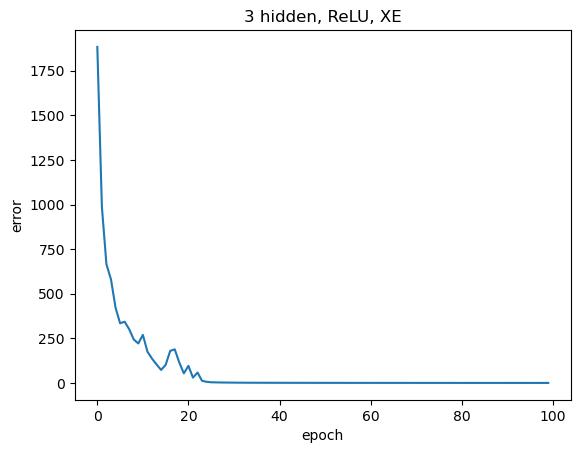

In [8]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('3 hidden, ReLU, XE')

##  Test  85% 

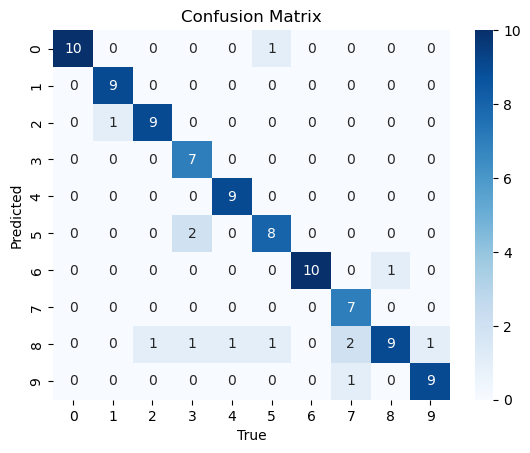

In [9]:
'''Forward pass the test data '''

z1 = np.matmul(W1.T,X_test) + b1
a1 = relu(z1)
z2 = np.matmul(W2.T,a1) + b2
a2 = relu(z2)
z3 = np.matmul(W3.T,a2) + b3
a3 = relu(z3)
z4 = np.matmul(W4.T,a3) + b4
a4 = softmax(z4)

''' turn the output into predictions '''

pos = np.argmax(a4, axis =0)
y_pred = np.zeros_like(a4)
y_pred[pos,range(y_pred.shape[1])] = 1

''' compute the confusion matirx '''
confusion = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        confusion[i,j] = np.dot(y_pred[i],Y_test[j])

import seaborn as sns

confusion_int = confusion.astype(int)

sns.heatmap(confusion_int, annot = True, fmt='d', cmap='Blues')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [10]:
np.trace(confusion)/100

0.87